In [6]:
import scanpy as sc

In [11]:
adata = sc.read_10x_h5("data/Parent_NGSC3_DI_PBMC_filtered_feature_bc_matrix.h5")
adata.var_names_make_unique()
print(adata.var_names.is_unique)

True


C:\Users\Laplace\AppData\Roaming\Python\Python313\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\Laplace\AppData\Roaming\Python\Python313\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
print(adata)          

AnnData object with n_obs × n_vars = 10194 × 36601
    var: 'gene_ids', 'feature_types', 'genome'


In [ ]:
print(adata.var_names)  


Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.5', 'AL627309.4', 'AP006222.2', 'AL732372.1',
       ...
       'AC133551.1', 'AC136612.1', 'AC136616.1', 'AC136616.3', 'AC136616.2',
       'AC141272.1', 'AC023491.2', 'AC007325.1', 'AC007325.4', 'AC007325.2'],
      dtype='object', length=36601)


In [ ]:
print(adata.obs_names)  

Index(['AAACCCACATAACTCG-1', 'AAACCCACATGTAACC-1', 'AAACCCAGTGAGTCAG-1',
       'AAACCCAGTGCTTATG-1', 'AAACGAACAGTCAGTT-1', 'AAACGAACATTCGGGC-1',
       'AAACGAAGTGATCATC-1', 'AAACGAAGTTCGGGTC-1', 'AAACGAAGTTGAATCC-1',
       'AAACGAATCCGTGGTG-1',
       ...
       'TTTGGTTGTTCTGAGT-1', 'TTTGGTTGTTTCACTT-1', 'TTTGTTGAGCTTGTTG-1',
       'TTTGTTGCAAGTGGGT-1', 'TTTGTTGCATCTAACG-1', 'TTTGTTGGTCCGTACG-1',
       'TTTGTTGGTCGGAACA-1', 'TTTGTTGGTTTACGAC-1', 'TTTGTTGTCGTTATCT-1',
       'TTTGTTGTCTTTGCTA-1'],
      dtype='object', length=10194)


In [ ]:
adata.X[:10, :10].todense()

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

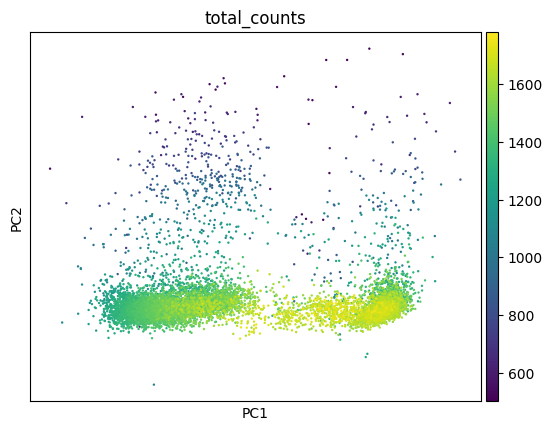

In [16]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.normalize_total(adata)
sc.tl.pca(adata)
sc.pl.pca(adata, color='total_counts')

In [15]:
print(adata.obs.columns)

Index(['n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes'],
      dtype='object')


# Clustering Data

In [17]:
import pandas as pd

In [ ]:
cluster_df = pd.read_csv("data/Parent_NGSC3_DI_PBMC_analysis/analysis/clustering/kmeans_2_clusters/clusters.csv")

print(cluster_df.head())

cluster_df = cluster_df.set_index("Barcode")

adata.obs["kmeans_2"] = adata.obs_names.map(cluster_df["Cluster"])

              Barcode  Cluster
0  AAACCCACATAACTCG-1        2
1  AAACCCACATGTAACC-1        1
2  AAACCCAGTGAGTCAG-1        2
3  AAACCCAGTGCTTATG-1        1
4  AAACGAACAGTCAGTT-1        2


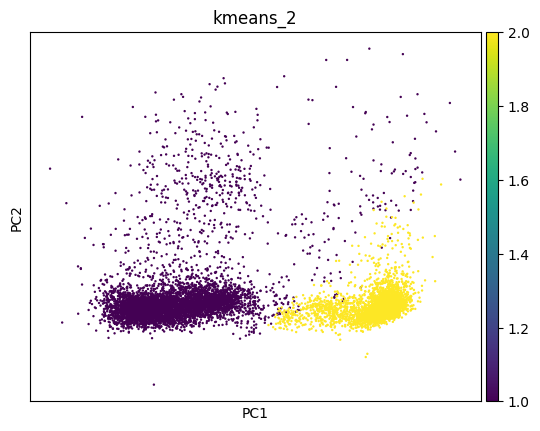

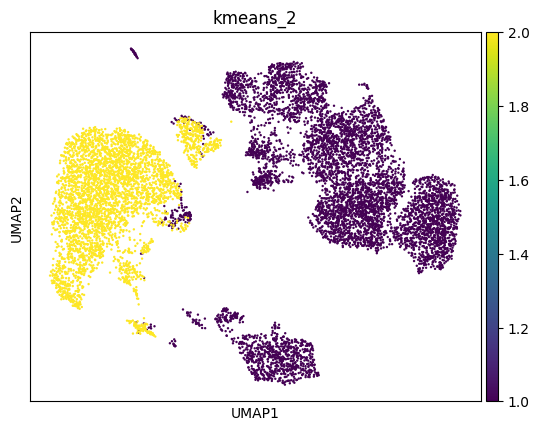

In [ ]:
sc.pl.pca(adata, color="kmeans_2")

sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

sc.tl.umap(adata)
sc.pl.umap(adata, color="kmeans_2")

In [21]:
adata.obs

,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,kmeans_6
AAACCCACATAACTCG-1,4803,4803,8.477204,1697.104736,7.437268,3.990931,7.549776,13.282617,25.857824,2
AAACCCACATGTAACC-1,2233,2233,7.711549,1470.910034,7.294316,5.451930,10.240588,17.748433,34.740962,4
AAACCCAGTGAGTCAG-1,4324,4324,8.372167,1656.256470,7.412919,4.186193,7.851209,14.157216,28.096502,2
AAACCCAGTGCTTATG-1,343,343,5.840642,687.841492,6.535011,16.503911,30.752347,59.249249,99.999849,5
AAACGAACAGTCAGTT-1,4143,4143,8.329417,1683.211304,7.429053,3.851616,7.163769,12.867660,25.886980,6
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTCCGTACG-1,3983,3983,8.290042,1656.385742,7.412997,4.006822,7.475167,13.561908,27.454528,2
TTTGTTGGTCGGAACA-1,1681,1681,7.427739,1346.301025,7.205859,6.598925,12.430702,21.506750,42.178524,1
TTTGTTGGTTTACGAC-1,1414,1414,7.254885,1282.371460,7.157246,7.075049,13.285548,23.034652,44.986771,1
TTTGTTGTCGTTATCT-1,2621,2621,7.871693,1542.539429,7.341834,4.481007,8.421956,15.404118,31.802748,2
